# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Shafly Khalifa Pamungkas
- **Email:** rakitisf@gmail.com
- **ID Dicoding:** shflll

## Menentukan Pertanyaan Bisnis

1. Pada musim apa jumlah penyewaan sepeda paling tinggi dan paling rendah?
2. Faktor apa yang mempengaruhi penurunan jumlah penyewaan sepeda?
3. Pada jam berapa saja jumlah penyewaan sepeda tertinggi dan terendah?
4. Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?
5. Apakah ada perbedaan signifikan dalam penyewaan sepeda antara pengguna terdaftar dan pengguna kasual?
6. Pada hari apa jumlah penyewaan sepeda paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
Berikut arti masing masing kolom

Kolom-kolom yang ada di dataset:

instant: Indeks atau ID unik untuk setiap catatan dalam dataset.

dteday: Tanggal pada data.

season: Musim saat data dikumpulkan:

1: Musim Semi

2: Musim Panas

3: Musim Gugur

4: Musim Dingin

yr: Tahun data (0 = 2011, 1 = 2012).

mnth: Bulan (1 hingga 12).

holiday: Menunjukkan apakah hari tersebut adalah hari libur (0 = bukan hari libur, 1 = hari libur).

weekday: Hari dalam minggu (0 = Minggu, 1 = Senin, dan seterusnya).

workingday: Menunjukkan apakah hari tersebut adalah hari kerja (1 = ya, 0 = tidak).

weathersit: Kondisi cuaca pada hari tersebut:

1: Cuaca cerah, beberapa awan, atau awan sebagian

2: Kabut, beberapa awan atau awan patah, kabut ringan

3: Salju ringan, hujan ringan dengan petir, atau awan tersebar

4: Hujan lebat, salju, kabut tebal

temp: Suhu udara yang dinormalisasi (dibagi dengan nilai maksimum 41°C).

atemp: Suhu yang dirasakan (dibagi dengan nilai maksimum 50°C).

hum: Kelembaban udara yang dinormalisasi (dibagi dengan nilai maksimum 100%).

windspeed: Kecepatan angin yang dinormalisasi (dibagi dengan nilai maksimum 67 km/jam).

casual: Jumlah pengguna yang tidak terdaftar yang menyewa sepeda.

registered: Jumlah pengguna terdaftar yang menyewa sepeda.

cnt: Total jumlah sepeda yang disewa, yaitu jumlah dari casual + registered.

Selain itu, pada tabel day dan tabel hour hanya berbeda 1 kolom, yaitu kolom "hr" yang menunjukkan pencatatan detil per jam nya, sedangkan tabel day mencatat per hari

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [6]:
day_df.duplicated().sum()

0

Terlihat  tidak ada missing value maupun duplikasi pada tabel day_df, masalah hanya terdapat keslahan tipedata untuk kolom dteday

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [9]:
hour_df.duplicated().sum()

0

Masalah pada tabel hour_df sama dengan day_df, yaitu kesalahan tipe data pada kolom dteday

**Insight:**
- Kesalahan tipe data pada kolom dteday, baik pada tabel day_df maupun hour_df

### Cleaning Data

In [10]:
falsecolumn = ["dteday"]
for column in falsecolumn:
    day_df[column] = pd.to_datetime(day_df[column])

In [11]:
falsecolumn = ["dteday"]
for column in falsecolumn:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [15]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Data pada tabel day_df dan hour_df terlihat sudah baik dan teratur, sehingga bisa dilanjutkan ke proses EDA

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
#Eksplorasi hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [17]:
hour_df.groupby(by="season").agg({
    "instant":"nunique",
    "cnt":"sum"
})

,instant,cnt
season,,
1,4242,471348
2,4409,918589
3,4496,1061129
4,4232,841613


In [18]:
day_df.groupby(by="season").agg({
    "instant":"nunique",
    "cnt":"sum"
})

,instant,cnt
season,,
1,181,471348
2,184,918589
3,188,1061129
4,178,841613


In [19]:
hour_df.groupby(by=["season","weathersit"]).agg({
    "instant":"nunique",
    "cnt":"sum"
})

instant     cnt
season weathersit                 
1      1              2665  325278
       2              1205  124205
       3               369   21642
       4                 3     223
2      1              2859  664463
       2              1144  207363
       3               406   46763
3      1              3280  801941
       2               947  212932
       3               269   46256
4      1              2609  546491
       2              1248  251452
       3               375   43670

Terlihat pada data diatas, bahwa penyewaan sepeda semakin turun ketika weathersit berada di kondisi 3, dan 4.Ingat, kondisi 3: Salju ringan, hujan ringan dengan petir, dan 4 adalah Hujan lebat, salju, dan kabut tebal.Dapat terlihat juga bahwa penyewaan sepeda terjadi paling sering di kondisi 1 dan 2.Mari kita lihat jumlah kondisi 1 dan 2, serta jumlah kondisi 3 dan 4 pada masing masing musim

In [20]:
# Menambahkan kolom kategori baru untuk mengelompokkan weathersit
hour_df["weathersit_group"] = hour_df["weathersit"].replace({
    1: "Good (1 & 2)",
    2: "Good (1 & 2)",
    3: "Bad (3 & 4)",
    4: "Bad (3 & 4)"
})

In [21]:
hour_df.groupby(by=['season','weathersit_group']).agg({
    "instant":"nunique",
    "cnt":"sum",
})

instant      cnt
season weathersit_group                  
1      Bad (3 & 4)           372    21865
       Good (1 & 2)         3870   449483
2      Bad (3 & 4)           406    46763
       Good (1 & 2)         4003   871826
3      Bad (3 & 4)           269    46256
       Good (1 & 2)         4227  1014873
4      Bad (3 & 4)           375    43670
       Good (1 & 2)         3857   797943

Terlihat jelas diatas, bahwa pada musim ketiga, yaitu musim gugur, kondisi weather sit mayoritas berada di kondisi 1, dan 2, yaitu kondisi 1:Cuaca cerah, beberapa awan, atau awan sebagian, dan kondisi 2:Kabut, beberapa awan atau awan patah, kabut ringan.Inilah salah satu faktor yang menyebabkan musim ketiga, musim gugur menjadi musim dengan penyewaan sepeda terbanyak.Sekarang, mari kita lihat dari faktor cuaca lainnya, seperti temp yang menunjukkan Suhu udara yang dinormalisasi (dibagi dengan nilai maksimum 41°C).atemp yang menunjukkan Suhu yang dirasakan (dibagi dengan nilai maksimum 50°C),hum: Kelembaban udara yang dinormalisasi (dibagi dengan nilai maksimum 100%), serta windspeed: Kecepatan angin yang dinormalisasi (dibagi dengan nilai maksimum 67 km/jam)

In [22]:
hour_df.groupby(by="season").agg({
    "temp":"mean",
    "atemp":"mean",
    "hum":"mean",
    "windspeed":"mean"
})

,temp,atemp,hum,windspeed
season,,,,
1,0.299147,0.298116,0.581348,0.215107
2,0.544663,0.520547,0.627022,0.203410
3,0.706410,0.656004,0.633167,0.171593
4,0.423138,0.415738,0.667124,0.170819


Terlihat bahwa suhu(temp dan atemp)pada musim ketiga cenderung paling tinggi, tetapi ini masih tahap moderat, mengingat sudah di standardisasi jadi rentang 0 sampai 1, sedangkan pada musim pertama, terlihat suhu paling rendah, sehingga orang cenderung memilih berdiam diri, dan menghangatkan diri di rumah, dibanding bersepeda.Terlihat juga pada kelembapan, musim ketiga paling tinggi, tetapi sekali lagi, ini sudah di standardisasi, dengan kelembapan seperti ini, ini adalah kelembapan ideal bagi kebanyakan orang, lain halnya pada musim 1.Sedangkan pada windspeed, musim ketiga termasuk terendah kedua setelah musim 4.Kecepatan angin yang cenderung rendah, membuat orang nyaman untuk bersepeda

In [23]:
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

Terlihat diatas, bahwa penyewaan sepeda, paling banyak berada di jam 17 atau jam 5 sore, ini bisa diasosiasikan dengan jam pulang kerja, lalu disusul jam 18, dan jam 8.Jam 8 disini bisa diasosiasikan dengan jam berangkat kerja. Tetapi saat kita lihat rentangnya, jam 16,17,18,19, termasuk dalam peringkat teratas dalam jam penyewaan sepeda, sehingga bila kita ingin tahu rentang jam dimana penyewaan sepeda terjadi paling banyak adalah sekitar jam 16 sampai jam 19, yaitu dari jam 4 sore sampai 7 malam. Ini bisa diasosiasikan bahwa orang cenderung menyewa sepeda ketika mereka pulang kerja. Sedangkan jam untuk penyewaan terendah berkisar dari jam 0 sampai jam 5, atau jam 12 malam sampai jam 5 pagi.Ini sebenarnya sudah jelas, jam jam ini adalah waktunya bagi kebanyakan orang untuk tertidur/beristirahat.

In [24]:
day_df.groupby("workingday").cnt.sum()

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

In [25]:
print(day_df[day_df["workingday"]==1]["cnt"].sum() - day_df[day_df["workingday"]==0]["cnt"].sum()) 

1292141


Terlihat bahwa perbedaan antara hari libur(0) dan hari kerja(1) sangatlah signifikan, artinya orang cenderung menyewa sepeda pada hari kerja dibanding untuk berlibur

In [26]:
print(day_df["registered"].sum())
print(day_df["casual"].sum())

2672662
620017


In [27]:
Total = day_df["registered"].sum() + day_df["casual"].sum()
Onepercent = 100/Total
print(f"{day_df["registered"].sum()* Onepercent:.1f}%")
print(f"{day_df["casual"].sum()* Onepercent:.1f}%")

81.2%
18.8%


Perbandingannya sangat jauh bukan?tentu ini bisa anda manfaatkan, misal menaikkan harga penyewaan tapi dengan benefit tertentu, contohnya pengguna yang terdaftar bisa meilih sepeda sesuka mereka, dan akan lebih diutamakan dibanding yang tidak terdaftar(casual).Tentunya ini bisa menaikkan revenue, dan juga bisa menambah penyewa terdaftar.

In [28]:
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

Keterangan : 0 menunjukkan hari minggu, 1 menunjukkan hari senin, dan seterusnya.

Ternyata  setelah diamati tidak ada perbedaan yang signifikan diantara hari harinya.Tetapi tetap, terlihat jelas bahwa day ke 5, alias hari Jum'at menjadi favorit untuk penyewaan sepeda. Mungkin saja ini hari penghujung sebelum libur, sehingga penyewa cenderung menyewa sepeda untuk menghabiskan waktunya sepulang kerja, ini juga sesuai dengan analisa kita sebelumnya, bahwa mayoritas penyewaan sepeda dilakukan saat jam pulang kerja, jadi masuk akal apabila penyewa cenderung memilih hari jum'at untuk menyewa sepeda.

**Insight:**
Kita telah menjawab segala pertanyaan pada Exploratory Data Analysis, mari kita urutkan

1. Pada musim apa jumlah penyewaan sepeda paling tinggi dan paling rendah?
   
Jawaban: Musim Gugur adalah musim dengan penyewaan terbanyak, sedangkan musim semi adalah musim dengan penyewaan terendah.

2. Faktor apa yang mempengaruhi penurunan jumlah penyewaan sepeda?
   
Jawaban: Kondisi cuaca sangat berpengaruh dalam penyewaan sepeda, penyewa cenderung menyukai kondisi ketika cuaca cerah dan kabut ringan. Penyewa juga lebih menyukai suhu yang moderat, tidak terlalu dingin dan tidak terlalu panas.lalu penyewa juga menyukai kelembapan yang ideal, dan windspeed yang cenderung rendah, sehingga bisa memudahkan mengayuh sepeda.

3. Pada jam berapa saja jumlah penyewaan sepeda tertinggi dan terendah?
   
Jawaban: Jam 4 sore sampai jam 7 malam adalah jam jam dimana penyewaan berada di puncaknya, sedangkan jam 12 malam sampai jam 5 pagi adalah jam jam dengan penyewaan terendah.

4. Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?
   
Jawaban: Ya, secara signifikan orang lebih memilih menyewa sepeda pada hari kerja, dibanding hari libur

5. Apakah ada perbedaan signifikan dalam penyewaan sepeda antara pengguna terdaftar dan pengguna kasual?
    
Jawaban:Perbedaan anatara penyewa casual dan terdaftar sangat berbeda jauh, ini menunjukkan sudah banyak sekali penyewa yang terdaftar, sehingga ini bagus untuk keberlangsungan bisnis.

6. Pada hari apa jumlah penyewaan sepeda paling tinggi dan paling rendah?
   
Jawaban: Terlihat jelas bahwa hari ke 5, Jum'at sangat diminati oleh penyewa sepeda. ini sesuai dengan pertanyaan ke 3, dan keempat, penyewa cenderung memilih hari kerja akhir untuk menghabiskan waktunya setelah pulang dari kerja di rentang jam 4 sore sampai jam 7 malam.


In [29]:
# Tentukan kolom yang ingin disimpan dari day_df
columns_to_keep = ["dteday"]

# Buat day_df baru dengan hanya kolom yang ingin disimpan
day_df_reduced = day_df[columns_to_keep]
day_hour_df = hour_df.merge(day_df_reduced, on="dteday")


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa jumlah penyewaan sepeda paling tinggi dan paling rendah?

C:\Users\user\AppData\Local\Temp\ipykernel_16340\3210889361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


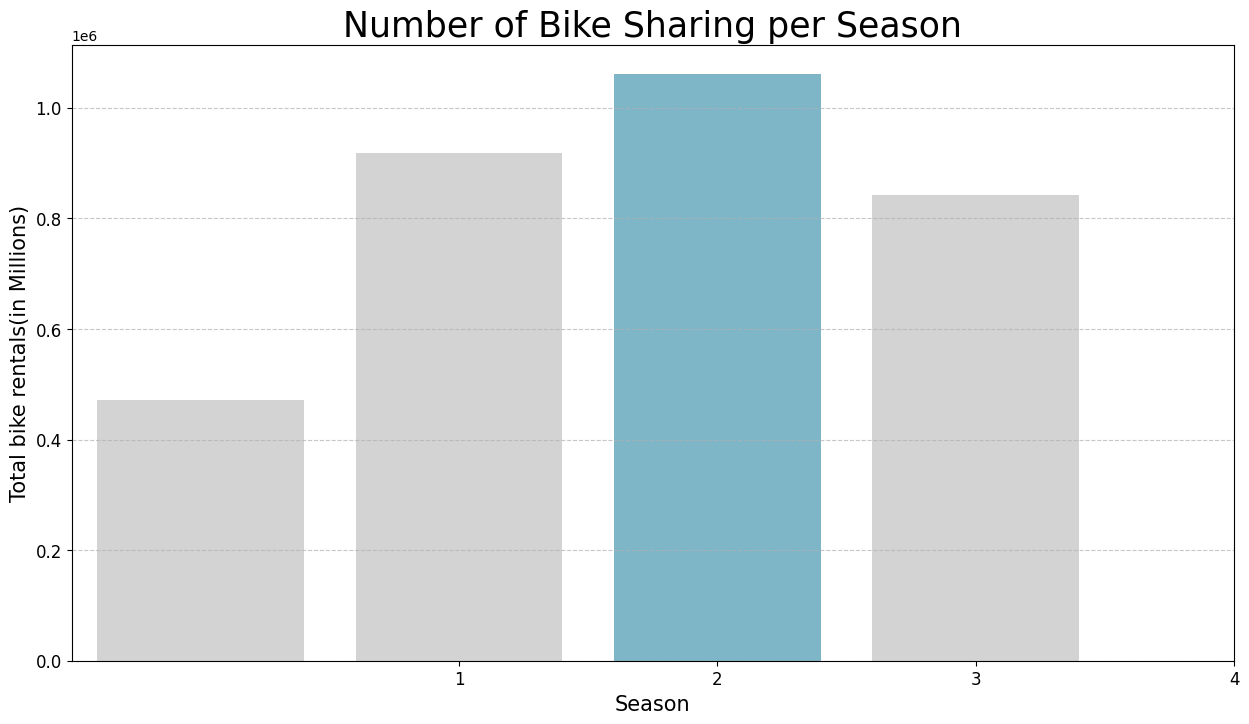

In [30]:
cnt_per_season = day_hour_df.groupby(by="season").cnt.sum()
colors = ["#D3D3D3", "#D3D3D3","#72BCD4", "#D3D3D3"]
plt.figure(figsize=(15,8))
sns.barplot(
    y=cnt_per_season.values,
    x=cnt_per_season.index,
    palette=colors
)

plt.title("Number of Bike Sharing per Season",loc='center',fontsize=25)
plt.xlabel("Season",fontsize = 15)
plt.ylabel("Total bike rentals(in Millions)", fontsize=15)
plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 2: Faktor apa yang mempengaruhi penurunan jumlah penyewaan sepeda?

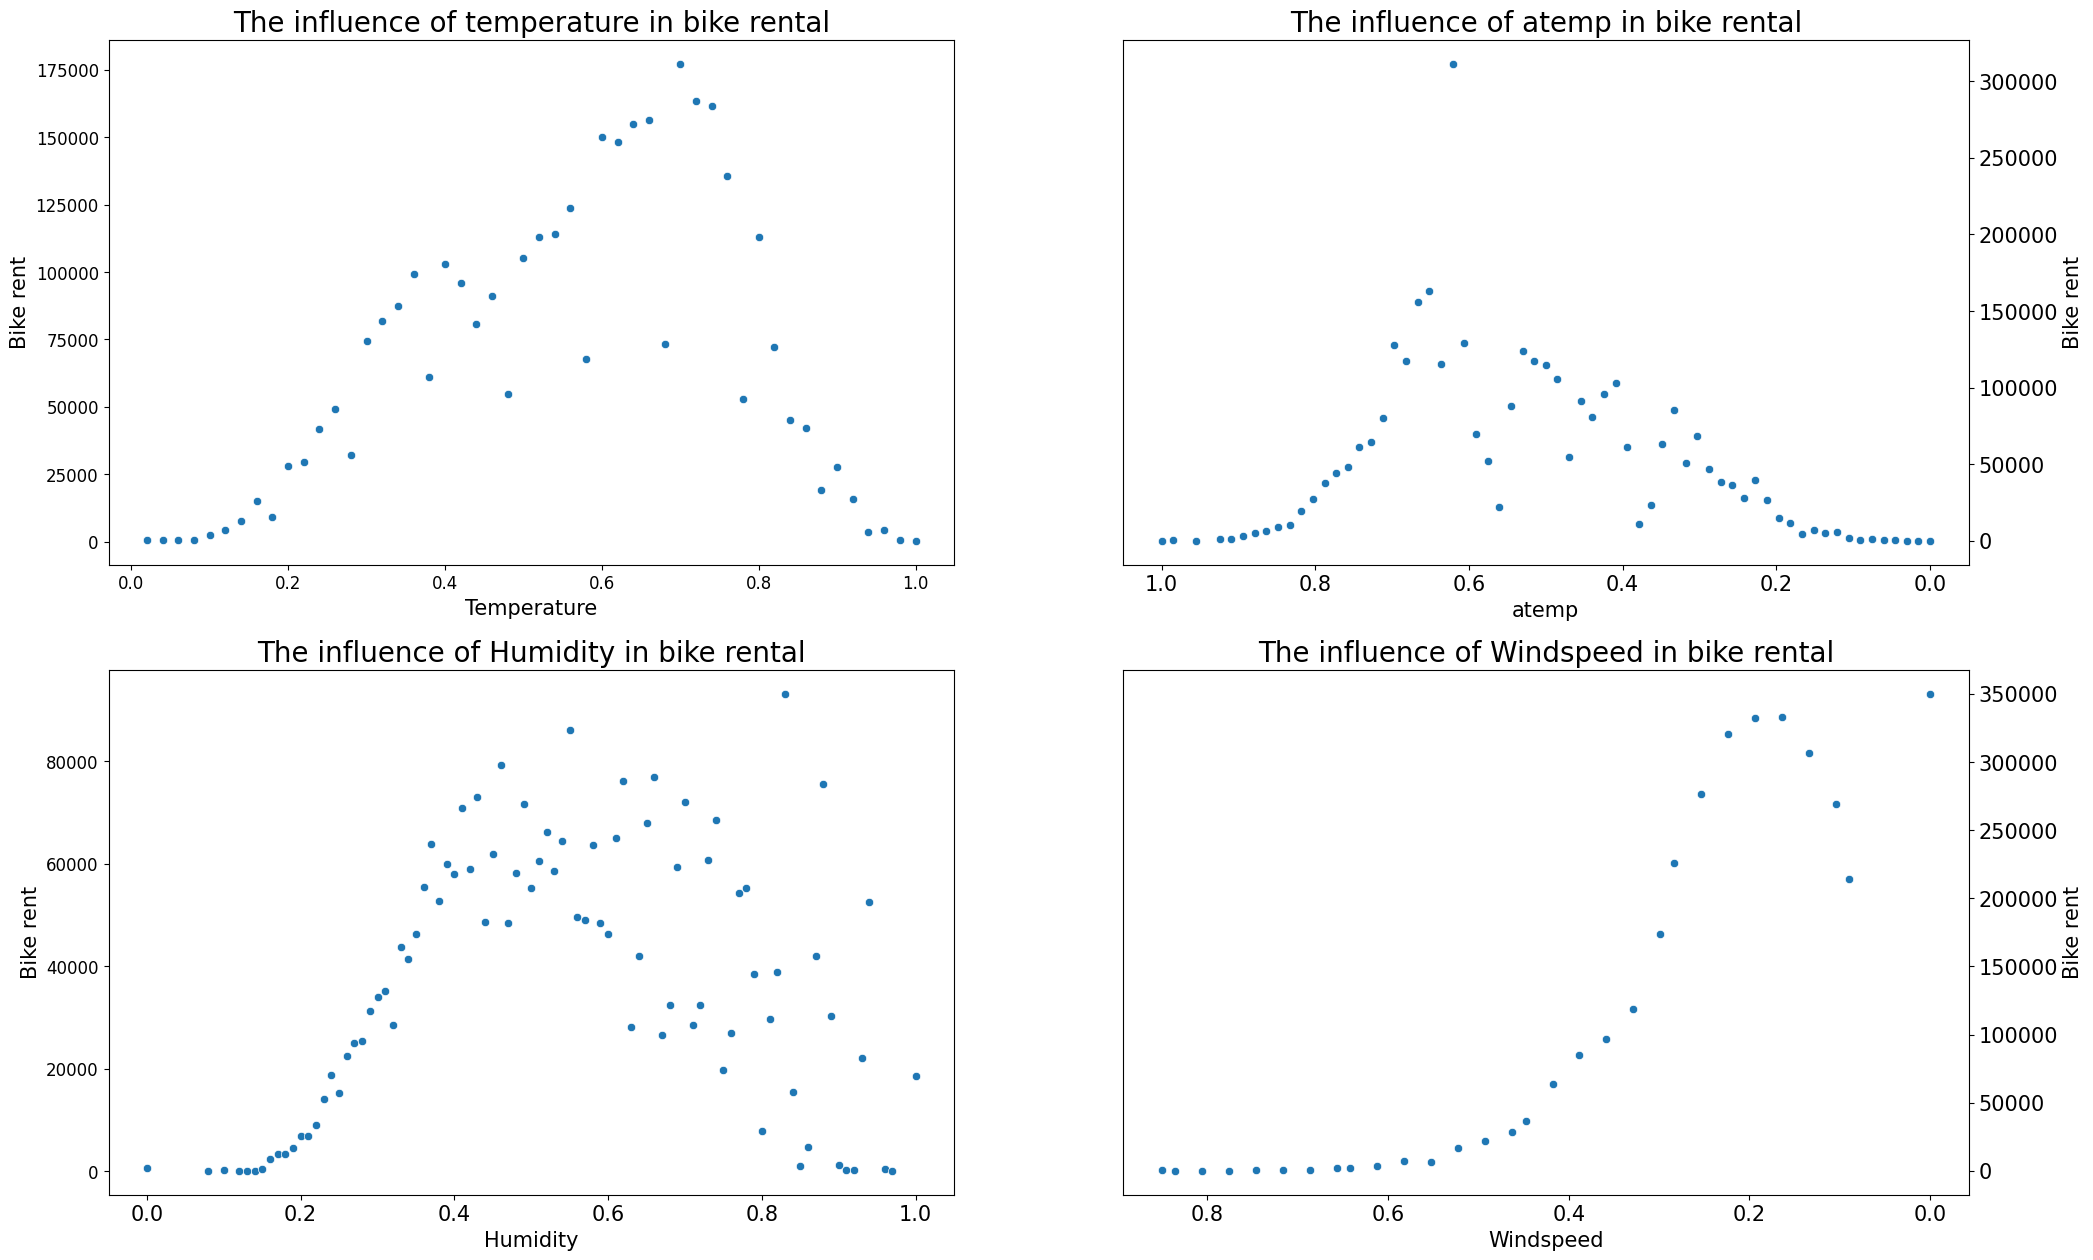

In [31]:
factors_temp = day_hour_df.groupby("temp").cnt.sum()
factors_atemp =  day_hour_df.groupby("atemp").cnt.sum()
factors_hum =  day_hour_df.groupby("hum").cnt.sum()
factors_windspeed =  day_hour_df.groupby("windspeed").cnt.sum()

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(24,15))
sns.scatterplot(x = factors_temp.index, y = factors_temp.values, ax=ax[0,0])
ax[0,0].set_ylabel("Bike rent",fontsize=15)
ax[0,0].set_xlabel("Temperature", fontsize=15)
ax[0,0].set_title("The influence of temperature in bike rental", fontsize = 20)
ax[0,0].tick_params(axis='y', labelsize=12)
ax[0,0].tick_params(axis='x', labelsize=12)

sns.scatterplot(x = factors_atemp.index, y = factors_atemp.values, ax=ax[0,1])
ax[0,1].set_ylabel("Bike rent",fontsize=15)
ax[0,1].set_xlabel("atemp",fontsize=15)
ax[0,1].invert_xaxis()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_title("The influence of atemp in bike rental", fontsize=20)
ax[0,1].tick_params(axis='y', labelsize=15)
ax[0,1].tick_params(axis='x', labelsize=15)

sns.scatterplot(x = factors_hum.index, y = factors_hum.values, ax=ax[1,0])
ax[1,0].set_ylabel("Bike rent", fontsize=15)
ax[1,0].set_xlabel("Humidity", fontsize=15)
ax[1,0].set_title("The influence of Humidity in bike rental", fontsize=20)
ax[1,0].tick_params(axis='y', labelsize=12)
ax[1,0].tick_params(axis='x', labelsize=15)

sns.scatterplot(x = factors_windspeed.index, y = factors_windspeed.values, ax=ax[1,1])
ax[1,1].set_ylabel("Bike rent",fontsize=15)
ax[1,1].set_xlabel("Windspeed", fontsize=15)
ax[1,1].invert_xaxis()
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_title("The influence of Windspeed in bike rental", fontsize=20)
ax[1,1].tick_params(axis='y', labelsize=15)
ax[1,1].tick_params(axis='x', labelsize=15)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16340\2587428407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


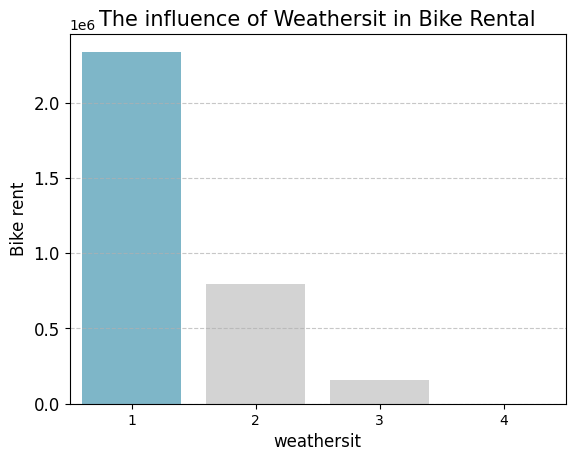

In [32]:
weathersit_factor = day_hour_df.groupby(by="weathersit").cnt.sum()
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y=weathersit_factor.values,
    x=weathersit_factor.index,
    palette=colors
)
plt.title("The influence of Weathersit in Bike Rental",fontsize=15)
plt.xlabel("weathersit", fontsize=12)
plt.ylabel("Bike rent",fontsize=12)
plt.xticks(ticks=range(4), labels=['1', '2', '3', '4'], fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
    

### Pertanyaan 3: Pada jam berapa saja jumlah penyewaan sepeda tertinggi dan terendah?

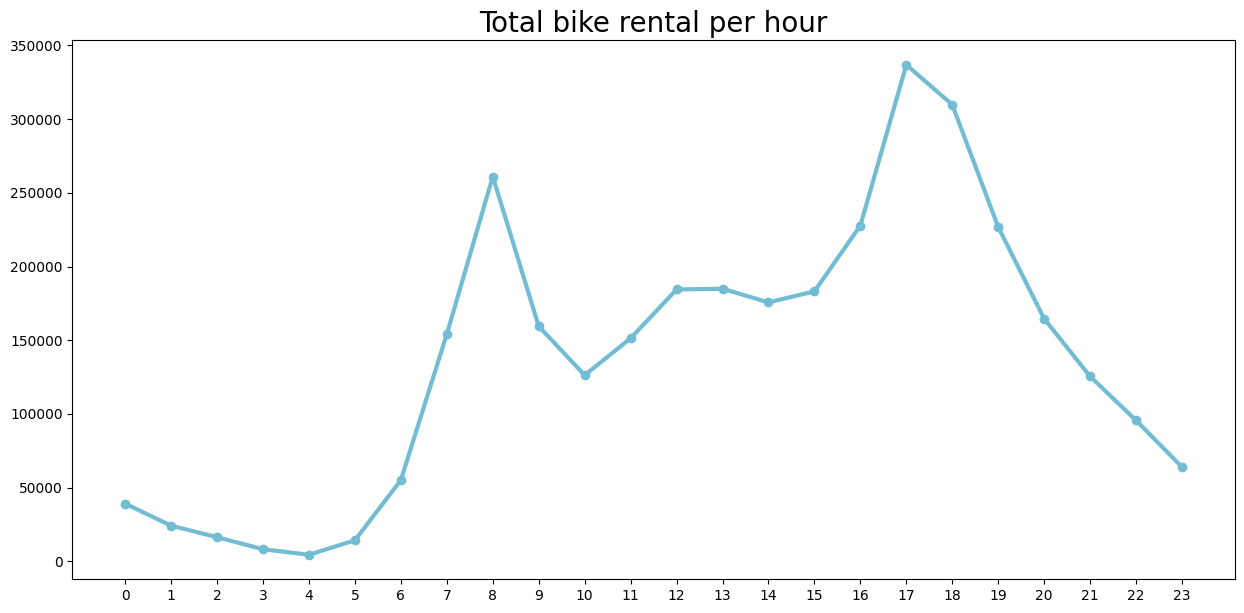

In [33]:
cnt_per_hour = day_hour_df.groupby(by="hr").cnt.sum()
plt.figure(figsize=(15,7))     
plt.plot(cnt_per_hour.index,cnt_per_hour.values,marker='o',linewidth=3,color="#72BCD4")
plt.title("Total bike rental per hour",loc="center",fontsize=20)
plt.xticks(ticks=range(24), labels=range(24), fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 4: Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

C:\Users\user\AppData\Local\Temp\ipykernel_16340\2503927185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


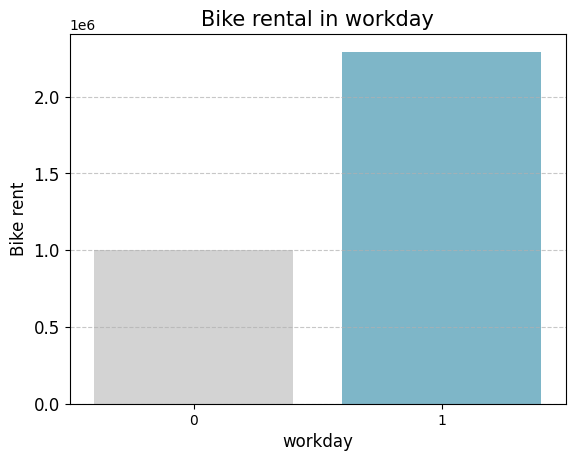

In [34]:
workday_factor = day_hour_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)
colors = ["#D3D3D3","#72BCD4"]

sns.barplot(
    y=workday_factor.values,
    x=workday_factor.index,
    palette=colors
)
plt.title("Bike rental in workday",fontsize=15)
plt.xlabel("workday", fontsize=12)
plt.ylabel("Bike rent",fontsize=12)
plt.xticks(ticks=range(2), labels=range(2), fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 5: Apakah ada perbedaan signifikan dalam penyewaan sepeda antara pengguna terdaftar dan pengguna kasual?

C:\Users\user\AppData\Local\Temp\ipykernel_16340\1789491140.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


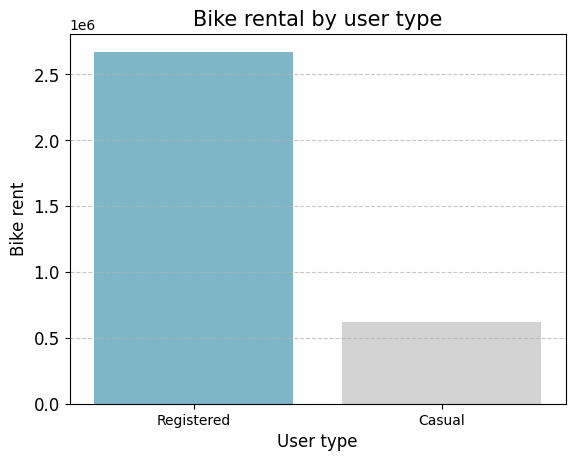

In [35]:
total_registered=day_hour_df.registered.sum()
total_casual=day_hour_df.casual.sum()


colors = ["#72BCD4","#D3D3D3"]

sns.barplot(
    y=[total_registered,total_casual],
    x=["Registered","Casual"],
    palette=colors
)
plt.title("Bike rental by user type",fontsize=15)
plt.xlabel("User type", fontsize=12)
plt.ylabel("Bike rent",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 6: Pada hari apa jumlah penyewaan sepeda paling tinggi dan paling rendah?

C:\Users\user\AppData\Local\Temp\ipykernel_16340\1711477740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


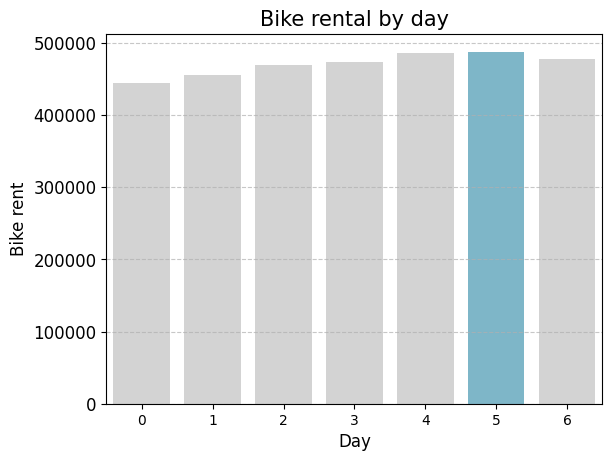

In [36]:
byday = day_hour_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False)
colors = ["#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#72BCD4","#D3D3D3"]

sns.barplot(
    y=byday.values,
    x=byday.index,
    palette=colors
)
plt.title("Bike rental by day",fontsize=15)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Bike rent",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
-Pada tahapan visualisasi data, kita membuktikan semua yang ada pada proses EDA sebelumnya
-Pada tahapan ini, disertai dengan permainan warna, sehingga bisa terlihat jelas oleh user mana bar bar dengan jumlah penyewaan terbanyak

## Analisis Lanjutan (Opsional)

Pada analisis lanjutan ini, saya ingin melihat pengaruh cuaca spesifik pada pengguna casual dan registered, saya ingin melihat pengguna casual atau registered lebih menyukai cuaca yang bagaimana.

Tujuan : Melihat apakah pengguna casual dan registered memiliki pola yang berbeda dalam menyewa sepeda berdasarkan kondisi cuaca.

sehingga analisis lanjutan ini saya sebut sebagai:

**Weather Impact Analysis With Segmented User**

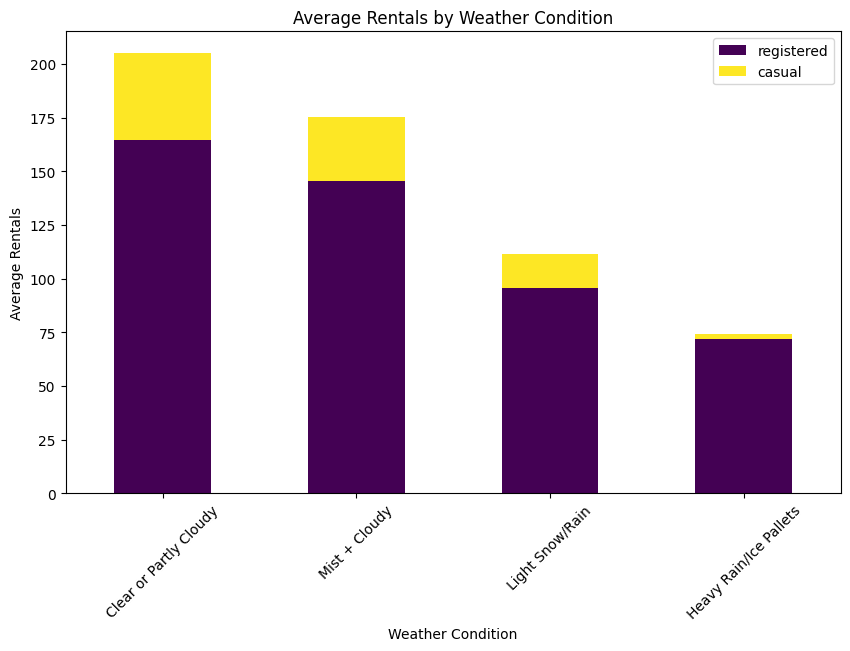

In [37]:
# Kelompokkan berdasarkan kondisi cuaca
weather_group = day_hour_df.groupby('weathersit')[['registered', 'casual']].mean().reset_index()

# Ganti nilai weathersit untuk visualisasi yang lebih deskriptif
weather_labels = {
    1: "Clear or Partly Cloudy",
    2: "Mist + Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Ice Pallets"
}
weather_group['weathersit'] = weather_group['weathersit'].map(weather_labels)

# Visualisasi

weather_group.plot(x='weathersit', kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Average Rentals by Weather Condition")
plt.ylabel("Average Rentals")
plt.xlabel("Weather Condition")
plt.xticks(rotation=45)
plt.show()


In [38]:
weather_group

,weathersit,registered,casual
0,Clear or Partly Cloudy,164.323841,40.545431
1,Mist + Cloudy,145.570202,29.595290
2,Light Snow/Rain,95.523608,16.055673
3,Heavy Rain/Ice Pallets,71.666667,2.666667


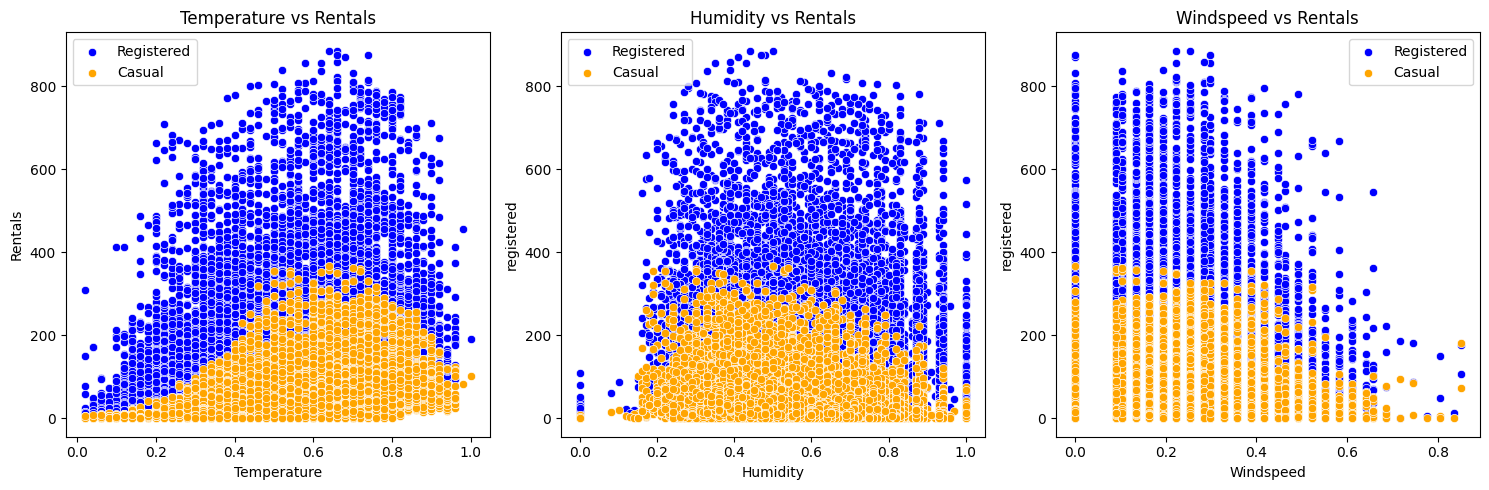

In [39]:
# Visualisasi hubungan suhu, kelembapan, dan kecepatan angin
plt.figure(figsize=(15, 5))

# Temperature
plt.subplot(1, 3, 1)
sns.scatterplot(data=day_hour_df, x='temp', y='registered', color='blue', label='Registered')
sns.scatterplot(data=day_hour_df, x='temp', y='casual', color='orange', label='Casual')
plt.title("Temperature vs Rentals")
plt.xlabel("Temperature")
plt.ylabel("Rentals")

# Humidity
plt.subplot(1, 3, 2)
sns.scatterplot(data=day_hour_df, x='hum', y='registered', color='blue', label='Registered')
sns.scatterplot(data=day_hour_df, x='hum', y='casual', color='orange', label='Casual')
plt.title("Humidity vs Rentals")
plt.xlabel("Humidity")

# Windspeed
plt.subplot(1, 3, 3)
sns.scatterplot(data=day_hour_df, x='windspeed', y='registered', color='blue', label='Registered')
sns.scatterplot(data=day_hour_df, x='windspeed', y='casual', color='orange', label='Casual')
plt.title("Windspeed vs Rentals")
plt.xlabel("Windspeed")

plt.tight_layout()
plt.show()

In [40]:
# Statistik deskriptif berdasarkan kategori cuaca
weather_stats = day_hour_df.groupby('weathersit')[['registered', 'casual']].describe()
print(weather_stats)

           registered                                                    \
                count        mean         std   min   25%    50%    75%   
weathersit                                                                
1             11413.0  164.323841  156.890453   0.0  39.0  128.0  232.0   
2              4544.0  145.570202  142.390431   0.0  34.0  111.0  208.0   
3              1419.0   95.523608  114.773469   0.0  19.0   55.0  129.0   
4                 3.0   71.666667   75.048873  22.0  28.5   35.0   96.5   

                    casual                                                     
              max    count       mean        std  min  25%   50%   75%    max  
weathersit                                                                     
1           886.0  11413.0  40.545431  53.126559  0.0  5.0  20.0  56.0  367.0  
2           822.0   4544.0  29.595290  41.356704  0.0  4.0  15.0  38.0  350.0  
3           791.0   1419.0  16.055673  30.017327  0.0  1.0   5.0  16.0  26

**Insight:**
1. Terlihat Tren yang sama sama menurun baik dari pengguna casual maupun registered dalam kondisi cuaca, berurutan dari kondisi cuaca 1 sampai 4, artinya baik pengguna registered, maupun casual sama sama menyukai kondisi cuaca 1, yaitu cuaca cerah dan agak berawan, dan tidak menyukai hujan lebat dan salju
2. Temperature vs Rentals:
   
       -Registered Users: Penyewa yang terdaftar(biru) terlihat memiliki hubungan positif yang kuat dengan temperature. Semakin tinggi suhu, cenderung semakin banyak penyewaan sepeda oleh pengguna terdaftar. Ini menunjukkan bahwa pengguna terdaftar cenderung lebih aktif pada hari-hari hangat(sampai pada titik tertentu)
   
       -Casual Users: Sebenarnya penyewa kasual (oranye) menunjukkan pola yang mirip, meskipun jumlah penyewaannya secara konsisten lebih rendah daripada penyewa terdaftar. Sehingga terlihat bahwa hubungan anatara suhu dan penyewaan sepeda oleh pengguna kasual tampak lebih lemah dibanding pengguna terdaftar.

3. Humidity vs Rentals:

       -Registered Users: Terlihat bahwa pengguna terdaftar lebih tersebar di humidity yang rendah hingga sedang.Ketika kelembapannya tinggi(sekitar diatas 8.0) maka penyewaan sepeda cenderung menurun.

       -Casual Users: Polanya sama seperti pengguna terdaftar, hanya saja skalanya lebih kecil dibanding pengguna terdaftar. Ini menunjukkan bahwa kelembapan tinggi mengurangi minat untuk bersepeda.

4.Windspeed vs Rentals:

    -Registered Users: Terlihat sekali hubungan negatif ditunjukkan pada kali ini.Semakin tinggi kecepatan angin, semakin sedikit penyewaan sepeda yang dilakukan oleh pengguna terdaftar. Ini wajar saja karena kondisi yang terlalu berangin, tentunya membuat bersepeda tidak nyaman.

    -Casual Users: Tentu, hubungan yang sama juga terlihat pada penyewa casual, tapi tetap saja tingkat penyewaan lebih rendah dibanding pengguna terdaftar di semua tingkat kecepatan angin.

## Conclusion

- Musim Gugur adalah musim dengan jumlah penyewaan sepeda terbanyak, dan musim semi adalah musim dengan jumlah penyewaan sepeda terendah, ini bisa dimanfaatkan, misal untuk mendorong penggunaan sepeda di musim semi,kita bisa melakukan promo promo khusus di musim semi, sehingga bisa menaikkan revenue bisnis 
- Kondisi cuaca, baik dari weathersit, temperature, humidity, sampai windspeed cukup berpengaruh.faktor faktor yang menyebabkan mengapa musim gugur menjadi juara dalam penyewaan sepeda juga karena faktor faktor ini, penyewa lebih suka temperatur yang moderat, cuaca yang cerah, humidity yang moderat, dan juga windspeed yang tidak kencang, ini dianggap kondisi paling ideal bagi para penyewa jika dilihat dari jumlah total penyewaan, ini bisa dimanfaatkan juga  dari sisi bisnis.Pemilik bisnis harus mulai aware dengan cuaca,mungkin bisa membaca situs situs ramalan cuaca, sehingga bisa tau kapan waktu terbaik untuk melakukan bisnis penyewaan sepeda, dengan ini, pemilik bisnis akan lebih paham kondisi penyewa, sehingga bisa membangun relationship yang baik.
- Terlihat bahwa jam di sekitar petang hari sangatlah optimal untuk melakukan penyewaan sepeda, penyewaan sepeda mayoritas terjadi pada rentang jam jam ini, yaitu dari jam 4 sore sampai jam 7 malam, ini mengindikasikan orang lebih suka mengayuh sepeda saat pulang kerja, mungkin saja orang ingin bersantai terlebih dahulu sebelum sampai rumah.Sedangkan jam penyewaan terdikit sebenarnya sudah jelas, yaitu dari jam 12 malam sampai jam 5 pagi, ini adalah jam jam dimana orang orang mayoritas beristirahat.Dengan ini pemilik bisnis bisa memahami penyewa dengan sangat baik,sehingga bisa mengatur strategi bisnis
- Terlihat pada visualisasi data, bahwa memang benar ada perbedaan signifikan antara hari kerja dan hari libur dalam konteks penyewaan sepeda, artinya orang orang cenderung memakai sepeda untuk berangkat maupun pulang kerja, dibanding untuk berlibur di akhir pekan.
- Bagi pemilik bisnis, ini  sangat menguntungkan, mengetahui bahwa sudah blebih banyak penyewa yang terdaftar dibanding casual, sehingga dengan ini pemilik bisnis, bisa melakukan strategi strategi khusus, misal diskon 10% bagi member yang baru bergabung.
- Pada kesimpulan ini, kita bisa lihat jelas juga pada visualisasi data, bahwa hari jum'at merupakan hari terbanyak orang melakukan penyewaan sepeda, sehingga ini bisa saja mengindikasikan orang lebih suka menghabiskan waktunya sepulang kerja untuk menikmati pemandangan dan bersantai terlebih dahulu, dibanding langsung pulang kerumah, tentunya ini senada dengan kesimpulan sebelumnya bahwa penyewa kebanyakan menyewa di hari kerja, dan di jam jam pulang kerja.Dengan ini semua, pemilik bisnis seharusnya punya cukup "amunisi"untuk merancang strategi strategi baru yang bisa meningkatkan performa bisnisnya